In [1]:
# Importação de Bibliotecas

In [68]:
#importando bibliotecas
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [69]:
#Carregando as variaveis tratadas no pré processamento
with open('../../../01-Análise Exploratória/Pré-Processamento/Credit Risk/base/credit.pkl', 'rb') as f:
    x_train, x_test, y_train, y_test = pickle.load(f)

In [70]:
x_train.shape

(26064, 3)

In [71]:
knn_credit = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p = 2)
knn_credit.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [72]:
previsoes = knn_credit.predict(x_test)

In [73]:
accuracy_score(y_test, previsoes)

0.8347399110019947

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      5179
         1.0       0.69      0.36      0.47      1338

    accuracy                           0.83      6517
   macro avg       0.77      0.66      0.69      6517
weighted avg       0.82      0.83      0.81      6517



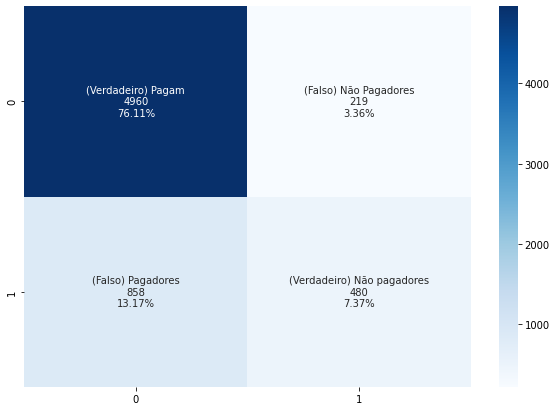

In [75]:
#Resultado da Classificação



print(classification_report(y_test, previsoes))
cf_matrix = confusion_matrix(y_test, previsoes)

plt.figure(figsize = (10,7))

group_names = ['(Verdadeiro) Pagam','(Falso) Não Pagadores','(Falso) Pagadores','(Verdadeiro) Não pagadores']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns_plot = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.savefig('img/confusion_matrix.png', dpi=300)